<a href="https://colab.research.google.com/github/gustavoSutil/materia-IA/blob/main/deep-learn/t1/t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho T1 - Arquitetura Básica de Redes Neurais

### Este trabalho tem como objetivo a compreensão da arquitetura básica de camadas de neurônios de uma rede neural artificial (RNA). A execução deste exercício permitirá aos estudantes o domínio dos métodos necessários para o treinamento e teste de uma RNA utilizando um dataset pré-processado.
## Instruções

#### O estudante deve treinar uma RNA com camadas densas e estilo feedforward para uma tarefa de classificação utilizando dataset pré-processado conforme especificado abaixo.
Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.
Para este trabalho, somente serão permitidas somente as seguintes bibliotecas python para o treinamento da RNA: numpy, scipy, tensorflow,  scikit-learn. Para visualização e criação de gráficos, também serão permitidas matplotlib, seaborn, plotly, yellowbrick.
Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.
### Limitações:
#### Utilize somente camadas do tipo Dense e otimizador SGD. Não utilize regularização, regimes de learning rate, dropout ou early stop. As funções de ativação devem ser escolhidas dentre sigmoid, tanh, relu e softmax.

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)
print(tf.version.VERSION)

2.14.0


# Treino

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


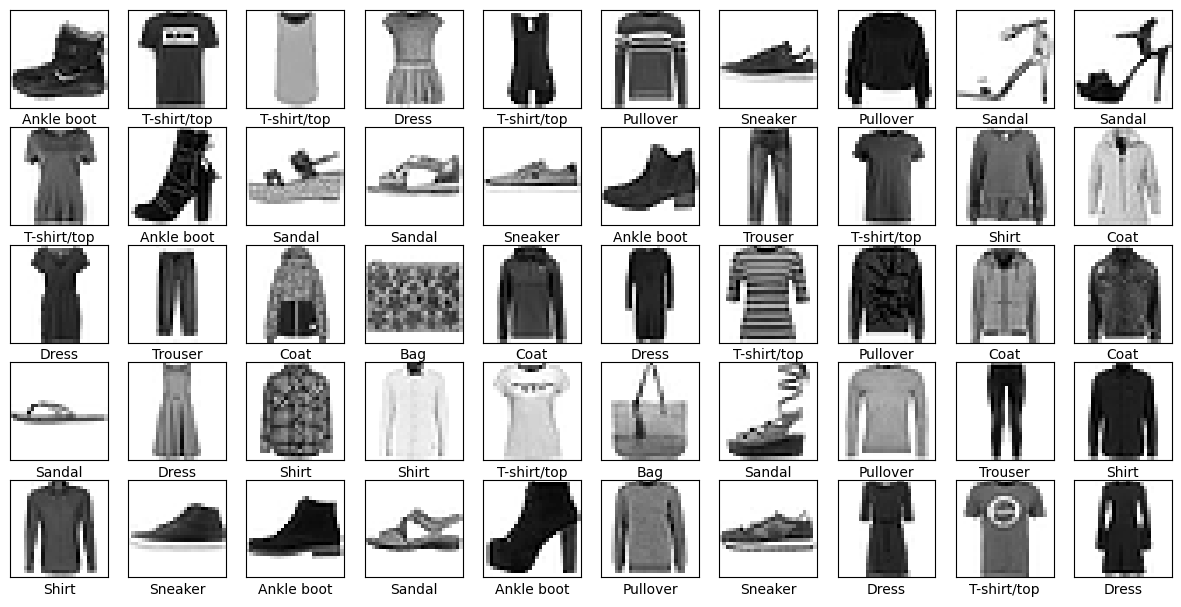

In [6]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

In [8]:
x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 ## pre-processamento dos dados
x_test /= 255 ## pre-processamento dos dados

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)

60000 exemplos de treino
10000 exemplos de teste


# Inicialização da implementação:

### Ainda preciso:
* Especificar a função de ativação
  *  Utilizarei a sofmax e a segmoid, como descrito no material Redes Neurais Artificiais: Arquitetura Prof. Dr. Giancarlo D. Salton
    *  Caso contrário haverá um neurônio para cada target identificado no problema. A ativação da camada de saída depende do problema: (a) se regressão, pode ser a função identidade; (b) se for classificação binária
    pode ser σ; ou softmax; (c) se classificação com mais de duas classes,
    usa-se a ativação softmax.
    * Resolvi fazer isso para uma maior filtragem no inicio da ativação dos dados e na camada de resultados ter uma precisão maior
* Especificar o tipo de camada
  * vou usar a Dense conforme a atividade
* Especificar o otimizador
  * vou usar o SGD conoforme a atividade
* Especificar a quantidade de neurônios
* Especificar da função de perda
 * vou usar a binary_crossentropy pois é top ou non-top (binário)
* treinar com o fit
  * definir as epocas e o batch size

In [11]:
from tensorflow.keras import layers, models

model = models.Sequential() # modelo sequencial

#(camada oculta) com ativação sigmoid
model.add(layers.Dense(128, #quantidade de neurônios
                       activation='sigmoid', # utilizarei sigmoid nesse caso
                       input_shape=(784,)) #784 neurônios, correspondendo ao número de features após o pré-processamento das imagens.
                       )

#camada de saída com softmax para classificar
model.add(layers.Dense(2, # a densidade da camada vai ser 2 pois a classificação é binaria
                       activation='softmax'))


model.compile(optimizer='sgd',#otimizador
              loss='binary_crossentropy',# função de perda
              metrics=['accuracy']#métrica (accuracy)
              )

#arquitetura do modelo
model.summary()

# treinando o modelo
history = model.fit(x_train, y_train,
                    epochs=1,        # vou colocar apenas 1 iteração para limitar o aprendizado
                    batch_size=32,
                    validation_data=(x_test, y_test))#validando a saída

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 100738 (393.51 KB)
Trainable params: 100738 (393.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3528 - accuracy: 0.8693 - val_loss: 0.2206 - val_accuracy: 0.9307


#### os resultados no meu teste foram:
- loss: 0.3528
- accuracy: 0.8693
- val_loss: 0.2206
- val_accuracy: 0.9307

### Isso foi um resultado bom visto que o modelo executou a penas 1 epoch (ou seja a ia não re-prossesou os resultados, e pode ter muita interferencia do bias). Mesmo assim o val_accurency (valor de acurácia) ficou acima de 90%.

outras informações sobre a saída:

* loss: função de perda no conjunto de treinamento após a época. Vê quão bem o modelo está performando a tarefa durante o treinamento. deve baixar treinamento (ou deveria).

* accuracy: Acurácia após a época nos dados de treinamento.

* val_loss: perda no conjunto de validação após a época, em dados que o modelo nunca viu durante o treinamento. ve se o modelo generaliza para novos dados (evitar overfiting).

* val_accuracy: Acurácia nos dados de validação.



# Vou treinar novamente mas agora com mais epocas (12), não irei alterar o tamanho dos grupos de entrada (bath_size)

In [14]:
# treinando o modelo
history = model.fit(x_train, y_train,
                    epochs=12,
                    batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1740 - accuracy: 0.9506 - val_loss: 0.1498 - val_accuracy: 0.9541
Epoch 2/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1298 - accuracy: 0.9630 - val_loss: 0.1233 - val_accuracy: 0.9630
Epoch 3/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1110 - accuracy: 0.9680 - val_loss: 0.1100 - val_accuracy: 0.9658
Epoch 4/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1006 - accuracy: 0.9705 - val_loss: 0.1019 - val_accuracy: 0.9684
Epoch 5/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0942 - accuracy: 0.9722 - val_loss: 0.0966 - val_accuracy: 0.9700
Epoch 6/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9733 - val_loss: 0.0929 - val_accuracy: 0.9705
Epoch 7/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9739 - val_loss: 0.0901 - val_accuracy:

aumentando as epocas, vi que a acurácia aumentou consideravelmente, inversamente com o erro, no final a diferença foi cada vez menor, porém o valor de acurácia caiu. Isso provavelme por que meu modelo estava entrando em overfitting.
Vou plotar para ficar mais fácil a visualização:

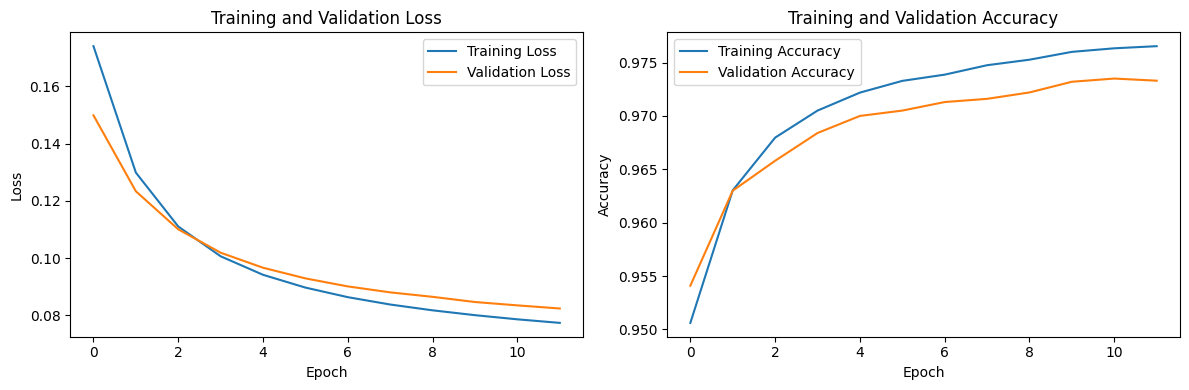

In [15]:
plt.figure(figsize=(12, 4))

# erro em funçao das epocas ou t
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# evolução da acurácia em funcao das épocas
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

para esses parâmetros o ideal seria próximo de 10 épocas. vou tentar com 15. e reduzir o bathsize pela metade....

In [18]:
# treinando o modelo
history = model.fit(x_train, y_train,
                    epochs=12,
                    batch_size=16,
                    validation_data=(x_test, y_test))

Epoch 1/12
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0702 - accuracy: 0.9791 - val_loss: 0.0757 - val_accuracy: 0.9761
Epoch 2/12
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0689 - accuracy: 0.9798 - val_loss: 0.0746 - val_accuracy: 0.9765
Epoch 3/12
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0679 - accuracy: 0.9796 - val_loss: 0.0736 - val_accuracy: 0.9763
Epoch 4/12
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0667 - accuracy: 0.9805 - val_loss: 0.0727 - val_accuracy: 0.9768
Epoch 5/12
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0657 - accuracy: 0.9805 - val_loss: 0.0717 - val_accuracy: 0.9771
Epoch 6/12
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0647 - accuracy: 0.9809 - val_loss: 0.0709 - val_accuracy: 0.9772
Epoch 7/12
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0637 - accuracy: 0.9812 - val_loss: 0.0700 - val_accuracy:

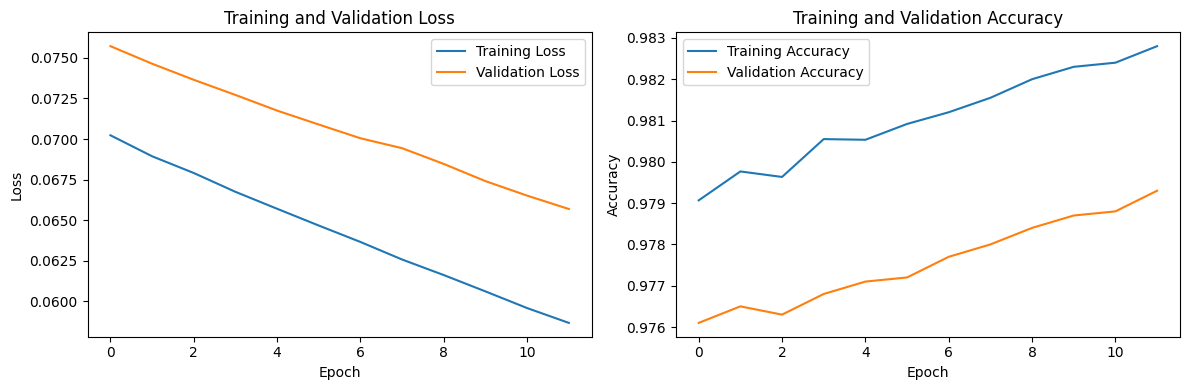

In [19]:
plt.figure(figsize=(12, 4))

# erro em funçao das epocas ou t
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# evolução da acurácia em funcao das épocas
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

ótimo, o modelo reduziu ainda mais o erro aumentou a acurácia e a acurácia de valor. Vou tentar aumentar a eficiência do modelo aumentando a quantidade de neuronios.

In [22]:
model = models.Sequential() # modelo sequencial

#(camada oculta) com ativação sigmoid
model.add(layers.Dense(256, #quantidade de neurônios
                       activation='sigmoid', # utilizarei sigmoid nesse caso
                       input_shape=(784,)) #784 neurônios, correspondendo ao número de features após o pré-processamento das imagens.
                       )

#camada de saída com softmax para classificar
model.add(layers.Dense(2, # a densidade da camada vai ser 2 pois a classificação é binaria
                       activation='softmax'))


model.compile(optimizer='sgd',#otimizador
              loss='binary_crossentropy',# função de perda
              metrics=['accuracy']#métrica (accuracy)
              )

#arquitetura do modelo
model.summary()

# treinando o modelo
history = model.fit(x_train, y_train,
                    epochs=12,        # vou colocar apenas 1 iteração para limitar o aprendizado
                    batch_size=16,
                    validation_data=(x_test, y_test))#validando a saída

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 2)                 514       
                                                                 
Total params: 201474 (787.01 KB)
Trainable params: 201474 (787.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/12
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2481 - accuracy: 0.9151 - val_loss: 0.1448 - val_accuracy: 0.9561
Epoch 2/12
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1180 - accuracy: 0.9662 - val_loss: 0.1086 - val_accuracy: 0.9667
Epoch 3/12
3750/3750 [==============================] - 8s 2ms/step - loss: 0.0970 - accuracy: 0.9713 - val_loss: 0.0963 -

não foi eficas. Algo que percebi é que durante a execução as camadas de saidas estavam interferindo na eficiência. Pelo que sei pode ser devido a camada softmax não estar performando tão bem. Acho que faz sentido inverter-las. Será um bom teste visto que a softmax é desenvolvida com base em funções probabilisicas.

In [23]:
model = models.Sequential() # modelo sequencial


model.add(layers.Dense(128, #quantidade de neurônios
                       activation='softmax',
                       input_shape=(784,)) #784 neurônios, correspondendo ao número de features após o pré-processamento das imagens.
                       )

#camada de saída com softmax para classificar
model.add(layers.Dense(2, # a densidade da camada vai ser 2 pois a classificação é binaria
                       activation='sigmoid'))


model.compile(optimizer='sgd',#otimizador
              loss='binary_crossentropy',# função de perda
              metrics=['accuracy']#métrica (accuracy)
              )

#arquitetura do modelo
model.summary()

# treinando o modelo
history = model.fit(x_train, y_train,
                    epochs=12,        # vou colocar apenas 1 iteração para limitar o aprendizado
                    batch_size=16,
                    validation_data=(x_test, y_test))#validando a saída

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 2)                 258       
                                                                 
Total params: 100738 (393.51 KB)
Trainable params: 100738 (393.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/12
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6355 - accuracy: 0.7235 - val_loss: 0.5089 - val_accuracy: 0.8945
Epoch 2/12
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3290 - accuracy: 0.9446 - val_loss: 0.2020 - val_accuracy: 0.9652
Epoch 3/12
3750/3750 [==============================] - 6s 2ms/step - loss: 0.1557 - accuracy: 0.9723 - val_loss: 0.1334 -

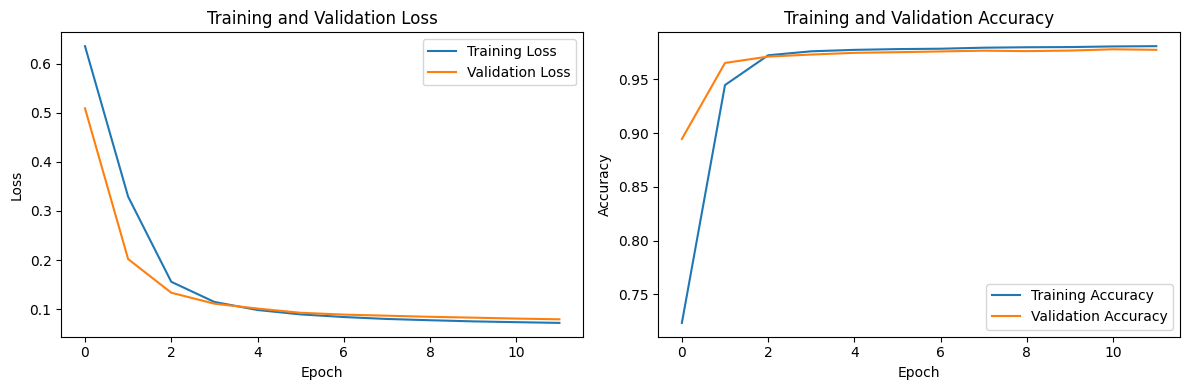

In [24]:
plt.figure(figsize=(12, 4))

# erro em funçao das epocas ou t
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# evolução da acurácia em funcao das épocas
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

apesar do erro ter sido maior, a acurácia e a acurácia de validação subiram, talvez pelo método necessite de mais epocas para concertar cenários onde a classificação foi errada. Também o crecimento foi linear ou seja, talvez ele não tenha atingido seu pico um adicional irei colocar sigmoid na camada de entrada também (depois irei testar ambas com softmax)

In [27]:
model = models.Sequential() # modelo sequencial


model.add(layers.Dense(128,
                       activation='sigmoid',
                       input_shape=(784,))
                       )

model.add(layers.Dense(2,
                       activation='sigmoid'))


model.compile(optimizer='sgd',#otimizador
              loss='binary_crossentropy',# função de perda
              metrics=['accuracy']#métrica (accuracy)
              )

#arquitetura do modelo
model.summary()

# treinando o modelo
history = model.fit(x_train, y_train,
                    epochs=18,
                    batch_size=16,
                    validation_data=(x_test, y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 2)                 258       
                                                                 
Total params: 100738 (393.51 KB)
Trainable params: 100738 (393.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/18
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2582 - accuracy: 0.9121 - val_loss: 0.1480 - val_accuracy: 0.9552
Epoch 2/18
3750/3750 [==============================] - 6s 2ms/step - loss: 0.1194 - accuracy: 0.9659 - val_loss: 0.1102 - val_accuracy: 0.9654
Epoch 3/18
3750/3750 [==============================] - 6s 2ms/step - loss: 0.0975 - accuracy: 0.9710 - val_loss: 0.0974 

o modelo ficou com ainda menos erro, agora com o softmax

In [ ]:
plt.figure(figsize=(12, 4))

# erro em funçao das epocas ou t
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# evolução da acurácia em funcao das épocas
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
model = models.Sequential() # modelo sequencial


model.add(layers.Dense(128,
                       activation='softmax',
                       input_shape=(784,))
                       )

model.add(layers.Dense(2,
                       activation='softmax'))


model.compile(optimizer='sgd',#otimizador
              loss='binary_crossentropy',# função de perda
              metrics=['accuracy']#métrica (accuracy)
              )

#arquitetura do modelo
model.summary()

# treinando o modelo
history = model.fit(x_train, y_train,
                    epochs=18,
                    batch_size=16,
                    validation_data=(x_test, y_test))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 2)                 258       
                                                                 
Total params: 100738 (393.51 KB)
Trainable params: 100738 (393.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/18
3750/3750 [==============================] - 6s 2ms/step - loss: 0.5729 - accuracy: 0.7798 - val_loss: 0.3454 - val_accuracy: 0.9480
Epoch 2/18
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2219 - accuracy: 0.9661 - val_loss: 0.1608 - val_accuracy: 0.9703
Epoch 3/18
3750/3750 [==============================] - 6s 2ms/step - loss: 0.1323 - accuracy: 0.9737 - val_loss: 0.1202 

Exception ignored in: <function _xla_gc_callback at 0x7d4cb44e1b40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


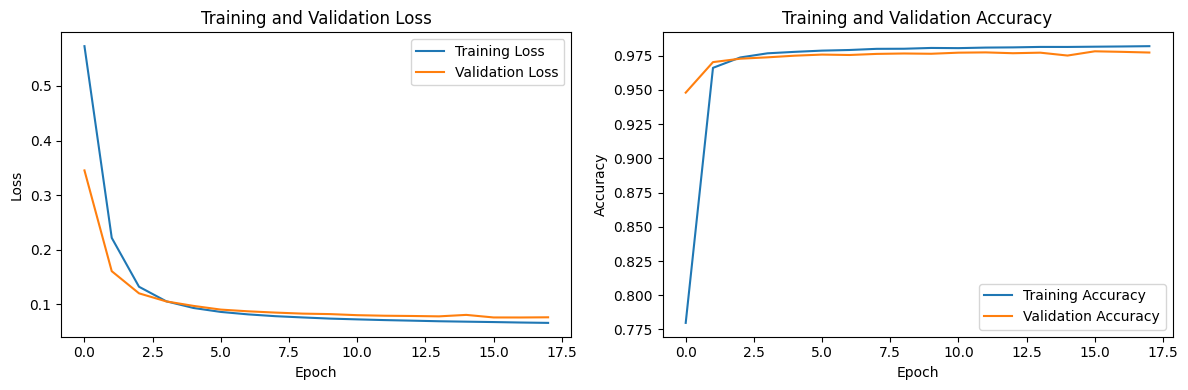

In [29]:
plt.figure(figsize=(12, 4))

# erro em funçao das epocas ou t
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# evolução da acurácia em funcao das épocas
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

visto que a performance utilizando as 4 possibilidades de função ativação não variou muito irei considerar a estratégia de usar softmax -> sigmoid